In [41]:
import os
import numpy as np
from pprint import pprint
from skimage import io as img
import matplotlib.pyplot as plt
import torch

In [47]:
input_name      = 'chinese1.jpg'
input_dir       = 'Input/People'
num_samples     = 1

model_dir  = '/home/manor/singan/SinGAN/TrainedModels/chinese1/scale_factor=0.750000,alpha=10'
output_dir = '/home/manor/singan/SinGAN/Output/RandomSamples/chinese1' 

is_save_noise_pyramid = True
is_not_cuda           = True

device = torch.device("cpu" if is_not_cuda else "cuda:0")

In [43]:
Gs       = torch.load('%s/Gs.pth'       % model_dir, map_location=device)
Zs       = torch.load('%s/Zs.pth'       % model_dir, map_location=device)
reals    = torch.load('%s/reals.pth'    % model_dir, map_location=device)
NoiseAmp = torch.load('%s/NoiseAmp.pth' % model_dir, map_location=device)

In [44]:
print(f'We have here {len(reals)} scales')

We have here 8 scales


In [45]:
for i in range(len(reals)):
    py_cmd = f'python random_samples.py --input_name {input_name} --input_dir {input_dir} --mode random_samples --gen_start_scale {str(i)} --num_samples {str(num_samples)}'
    if is_not_cuda: py_cmd += ' --not_cuda'
    if is_save_noise_pyramid: py_cmd += ' --save_noise_pyramid'
    print(f'Run random_samples.py ...', end=' ')
    os.system(py_cmd)
    print('Done.')

Run random_samples.py ... Done.
Run random_samples.py ... Done.
Run random_samples.py ... Done.
Run random_samples.py ... Done.
Run random_samples.py ... Done.
Run random_samples.py ... Done.
Run random_samples.py ... Done.
Run random_samples.py ... Done.


In [51]:
output_paths,output_imgs,output_dists = [],[],[]
for subdir in os.listdir(output_dir):
    for f in os.listdir(os.path.join(output_dir,subdir)):
        if f[-4:] != '.png' : continue
        img_t = os.path.join(output_dir, subdir, f)
        output_paths.append(img_t)
output_paths.sort()

for op in output_paths:
    output_imgs.append(img.imread(op))

pprint(output_paths)  

['/home/manor/singan/SinGAN/Output/RandomSamples/chinese1/gen_start_scale=0/0.png',
 '/home/manor/singan/SinGAN/Output/RandomSamples/chinese1/gen_start_scale=1/0.png',
 '/home/manor/singan/SinGAN/Output/RandomSamples/chinese1/gen_start_scale=2/0.png',
 '/home/manor/singan/SinGAN/Output/RandomSamples/chinese1/gen_start_scale=3/0.png',
 '/home/manor/singan/SinGAN/Output/RandomSamples/chinese1/gen_start_scale=4/0.png',
 '/home/manor/singan/SinGAN/Output/RandomSamples/chinese1/gen_start_scale=5/0.png',
 '/home/manor/singan/SinGAN/Output/RandomSamples/chinese1/gen_start_scale=6/0.png',
 '/home/manor/singan/SinGAN/Output/RandomSamples/chinese1/gen_start_scale=7/0.png']


### Calculate euclidean distance between each 2 consecutive images.
We expect the distance to become smaller as the start scale get bigger.  

[53656.336438485996, 56360.93345571913, 52542.59537746494, 51951.97875923495, 52133.69404713232, 50521.50724196577, 48852.72978043294]


Text(0.5, 1.0, 'Frobenius Distances between consecutive images')

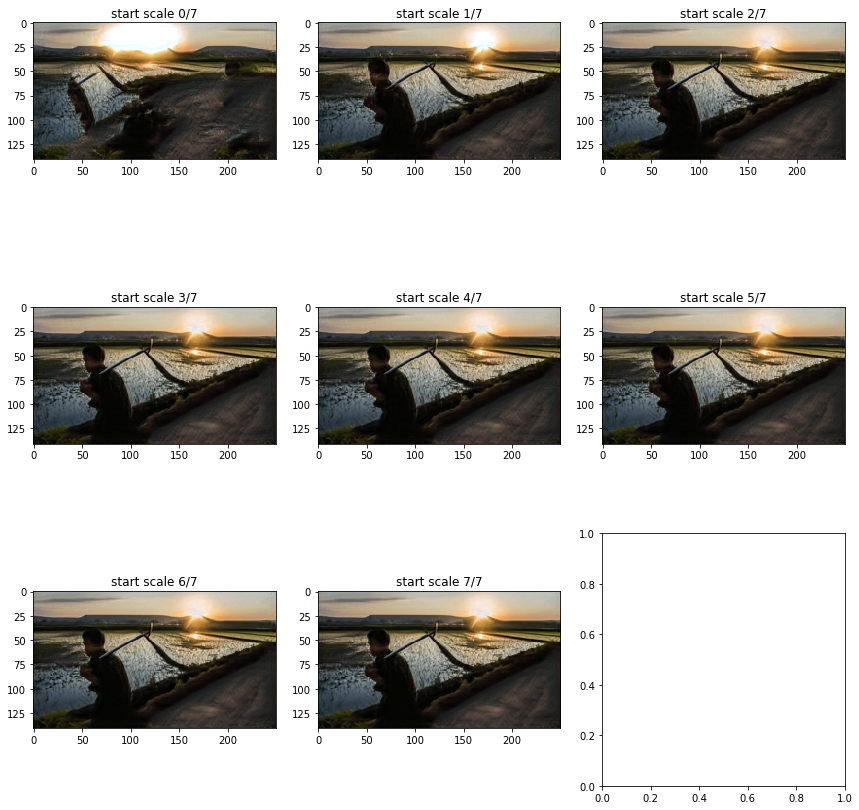

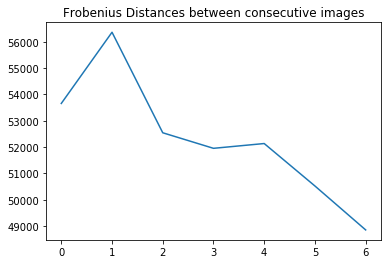

In [52]:
size = int(np.ceil(np.sqrt(len(output_imgs))))
rows, cols = size, size
fig, axes = plt.subplots(rows,cols, figsize=(12,12))
fig.tight_layout()
for i, otpt_img in enumerate(output_imgs):
    axes[int(i/size),int(i%size)].imshow(otpt_img)
    axes[int(i/size),int(i%size)].set_title(f'start scale {i}/{len(reals)-1}')
    
    if i > 0: output_dists.append(np.linalg.norm(output_imgs[i] - output_imgs[i-1]))

print(output_dists)
fig,ax = plt.subplots()
ax.plot(output_dists)
ax.set_title('Frobenius Distances between consecutive images')